In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
train_df=pd.read_csv('project train.csv')

In [3]:
train_df.head(5)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [4]:
train_df.shape

(10240, 2)

<AxesSubplot:xlabel='Label', ylabel='count'>

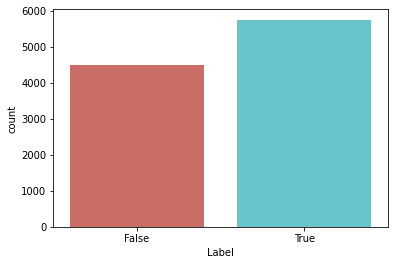

In [5]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [6]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [7]:
train_df = train_df.dropna()

In [8]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [9]:
train_df.shape

(10240, 2)

In [10]:
train_df.head(5)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [11]:
train_df.reset_index(drop= True,inplace=True)
train_df.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [12]:
label_train = train_df.Label  #this is my Y

In [13]:
label_train.head(5)

0    False
1     True
2     True
3    False
4     True
Name: Label, dtype: bool

In [14]:
train_df=train_df.drop("Label",axis=1)

In [15]:
train_df.head(5)

,Statement
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...


In [16]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english')) #stopword contains least important/meaningful texts

In [17]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['Statement'][x] = review    

In [18]:
train_df['Statement'][2182]

'new york city murder'

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['Statement'], label_train, test_size=0.3,random_state=4)

In [20]:
X_train

10222    first time since korean war total federal spen...
441          isi camp mile texas mexican authority confirm
9582     wisconsin economy tanked gov scott walker ands...
4823     million people moved georgia past two census c...
8593     according state florida almost twice likely at...
                               ...                        
456      pay among highest toll nation privilege crossi...
6017     birth control pioneer margaret sanger believed...
709                                               abortion
8366     cbo found house republican health care plan wo...
1146     majority team spending dollar offensive side f...
Name: Statement, Length: 7168, dtype: object

In [21]:
X_train.shape

(7168,)

In [22]:
Y_train = Y_train.astype('int64')

In [23]:
Y_test = Y_test.astype('int64')

In [24]:
Y_test

671      0
2549     1
10085    1
2589     1
9181     1
        ..
2321     1
7325     0
3818     0
3732     1
1259     1
Name: Label, Length: 3072, dtype: int64

In [25]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [26]:
tfidf_X_train.shape


(7168, 9093)

In [27]:
tfidf_X_train

<7168x9093 sparse matrix of type '<class 'numpy.float64'>'
	with 71548 stored elements in Compressed Sparse Row format>

In [28]:
max_value = tfidf_X_train.max(axis=0).toarray().ravel() # the sparse matrix is converted into normal array and then into 1D array, the max gives max value of each row
sorted_by_tfidf= max_value.argsort() # sorts the 1D array in asc.
features = np.array(tfidf_v.get_feature_names()) # gives the feature names and stores in a array
print(features[sorted_by_tfidf[:10]])#prints first 10 values
print(features[sorted_by_tfidf[-10:]])

['educationgovernmentregulationjobaccomplishmentslaborunions'
 'democratcontrolled' 'johnboehner' 'magnetic' 'healthcaremedicaid'
 'stayathome' 'levitation' 'crossroadsgps' 'energyfederalbudgetstimulus'
 'westerville']
['hunger' 'raising' 'traffic' 'smaller' 'sequestration' 'reconciliation'
 'bankrupt' 'filibustered' 'abortion' 'torture']


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

In [31]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)

In [32]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 54.13%


Confusion matrix, without normalization


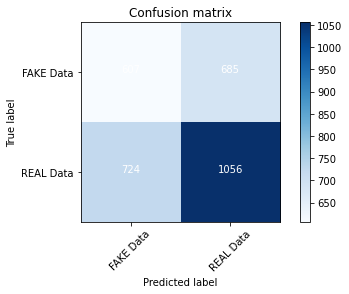

In [33]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


In [34]:
#to convert a data into binary
pickle.dump(classifier,open('./model.pkl', 'wb'))

In [35]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [36]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake News ")
    else:
        print("Prediction of the News : Looking Real New ")

In [37]:
fake_news_det(X_test.iloc[1])

Prediction of the News :  Looking Fake News 


In [38]:
Y_test.head(5)

671      0
2549     1
10085    1
2589     1
9181     1
Name: Label, dtype: int64